# Consumer Complaints
## Analyzing the December 2014 CFPB Consumer Complaint Database

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
cdata = pd.read_csv('complaints_dec_2014.csv')

In [3]:
cdata

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
5,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
6,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322,Web,12/31/2014,01/07/2015,Amex,Closed with explanation,Yes,NaN
7,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023,Web,12/31/2014,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
8,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN
9,1177139,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN


In [4]:
cdata.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'ZIP code', 'Submitted via', 'Date received', 'Date sent to company',
       'Company', 'Company response', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [5]:
cdata.Product.unique()

array(['Debt collection', 'Credit card', 'Bank account or service',
       'Credit reporting', 'Mortgage', 'Money transfers', 'Consumer loan',
       'Student loan', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)

In [6]:
date_series = cdata.pop('Date received')

In [7]:
date_series.head()

0    12/31/2014
1    12/31/2014
2    12/31/2014
3    12/31/2014
4    12/31/2014
Name: Date received, dtype: object

In [8]:
pd.to_datetime(date_series, format='%m/%d/%Y').head()

0   2014-12-31
1   2014-12-31
2   2014-12-31
3   2014-12-31
4   2014-12-31
Name: Date received, dtype: datetime64[ns]

In [9]:
cdata.index = pd.to_datetime(date_series, format='%m/%d/%Y')

In [10]:
cdata.Product.value_counts()

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
dtype: int64

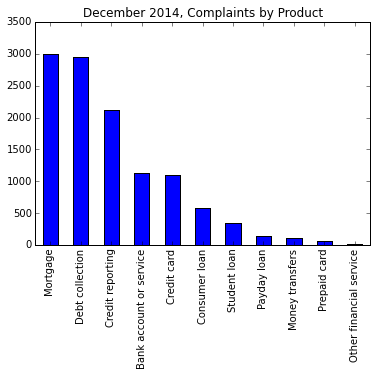

In [11]:
cdata.Product.value_counts().plot(title='December 2014, Complaints by Product', kind='bar')
plt.show()

Mortgage, debt collection, and credit reporting are the three dominant products that customers issued complaints for in December 2014.

In [12]:
cdata.Company.value_counts()[:10]

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
dtype: int64

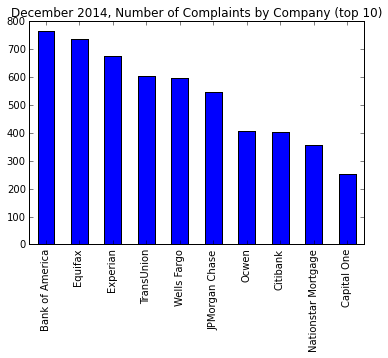

In [13]:
cdata.Company.value_counts()[:10].plot(title='December 2014, Number of Complaints by Company (top 10)', kind='bar')
plt.show()

Although credit reporting is third in the rank of overall complaint totals, there are two major players—Equifax and Experian—that garner the bulk of these complaints (1,412 of the 2,113 between them). There are many banks that share the load of the complaints for mortgages, headed by Bank of America.

In [14]:
cdata['Company response'].value_counts()

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
dtype: int64

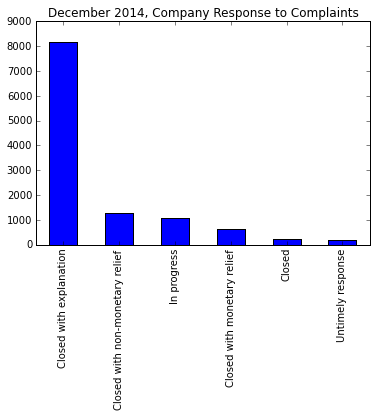

In [15]:
cdata['Company response'].value_counts().plot(title='December 2014, Company Response to Complaints', kind='bar')
plt.show()

If you were hoping to get money as a result of the handling of your complaint, the likelihood in December 2014 was very low: 643 / 11542 * 100% = 5.57%.

The percentage of complaints "closed with explanation" in December 2014 was 8185 / 11542 * 100% = 70.91%

In [16]:
cdata['weekday'] = cdata.index.weekday

In [17]:
cdata2 = cdata.replace({'weekday': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                                   3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}})

In [18]:
cdata2.weekday.value_counts()

Tuesday      2580
Monday       2544
Wednesday    2289
Thursday     1634
Friday       1446
Saturday      543
Sunday        507
dtype: int64

TypeError: unorderable types: numpy.ndarray() < str()

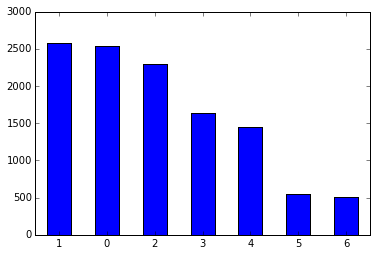

In [47]:
cdata2.weekday.value_counts().plot(
    title='December 2014, Number of Complaints by Day of Week', 
    kind='bar', 
    xticks=(['Mo', 'Tu', 'Wd', 'Th', 'Fr', 'Sa', 'Su']))
plt.show()

Apparently, complaints are often lodged earlier in the week, with the relative number dropping off significantly from Thursday on.

In [56]:
date_counts = cdata.weekday.resample('d', how=['count'])

In [57]:
date_counts['weekday'] = date_counts.index.weekday

In [58]:
date_counts

,count,weekday
Date received,,
2014-12-01,474,0
2014-12-02,516,1
2014-12-03,494,2
2014-12-04,571,3
2014-12-05,426,4
2014-12-06,147,5
2014-12-07,117,6
2014-12-08,526,0
2014-12-09,503,1


In [60]:
date_counts[date_counts.weekday == 0].mean()

count      508.8
weekday      0.0
dtype: float64

In [62]:
[date_counts[date_counts.weekday == x].mean()[0] for x in range(7)]

[508.80000000000001, 516.0, 457.80000000000001, 408.5, 361.5, 135.75, 126.75]

In [65]:
res = [date_counts[date_counts.weekday == x].mean()[0] for x in range(7)]

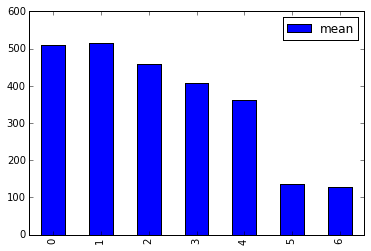

In [68]:
pd.DataFrame(res).rename(columns={0: 'mean'}).plot(kind='bar')
pass

In [20]:
cdata['Submitted via'].value_counts()

Web            8349
Referral       1603
Postal mail     723
Phone           710
Fax             154
Email             4
dtype: int64

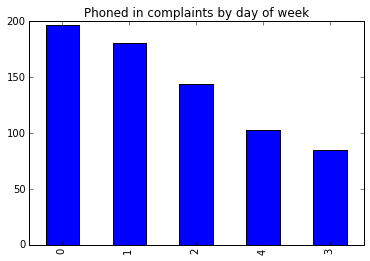

In [21]:
cdata[cdata['Submitted via'] == 'Phone'].weekday.value_counts().plot(title='Phoned in complaints by day of week', kind='bar')
plt.show()

Unlike the web, people must call during the week to lodge their complaints.

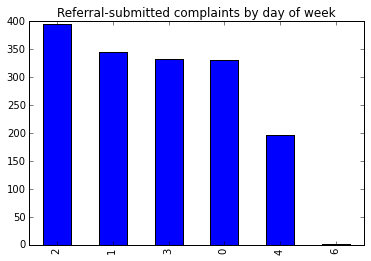

In [22]:
cdata[cdata['Submitted via'] == 'Referral'].weekday.value_counts().plot(title='Referral-submitted complaints by day of week', kind='bar')
plt.show()

Perhaps customer service folks are more productive on Wednesdays, or are getting put in touch with people who started their process on Monday or Tuesday (the most active complaint days).

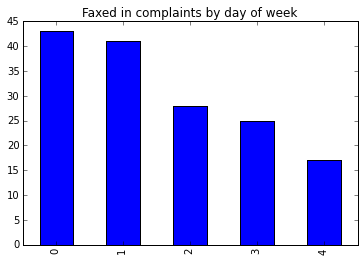

In [23]:
cdata[cdata['Submitted via'] == 'Fax'].weekday.value_counts().plot(title='Faxed in complaints by day of week', kind='bar')
plt.show()

I expect Monday is augmented by the weekend fax activity that goes unprocessed until the office staff returns for a new week.

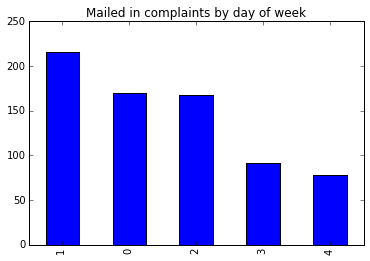

In [24]:
cdata[cdata['Submitted via'] == 'Postal mail'].weekday.value_counts().plot(title='Mailed in complaints by day of week', kind='bar')
plt.show()

Similar to faxes that pile up over the weekend, I would expect Monday to be a big day for mail processing. It is surprising that Tuesday is the big day here. Especially because mail rarely is an overnight affair; to arrive on Tuesday, it would need to be mailed late in the previous week (which is against the trends). There may be an office staffing issue behind this. Or, maybe people take care of their complaint while they are home for the weekend and it arrives by Tuesday.

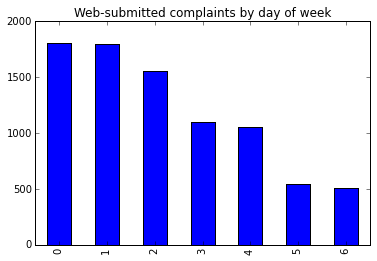

In [25]:
cdata[cdata['Submitted via'] == 'Web'].weekday.value_counts().plot(title='Web-submitted complaints by day of week', kind='bar')
plt.show()

As this is the largest component, it is not surprising that it follows the trend of the overall graph. Monday did just edge out Tuesday for the highest volume, however.

# Hard Mode

Census data from https://www.census.gov/popest/data/datasets.html (Vintage 2014 State Population Datasets)

State Abbreviation csv from: http://www.fonz.net/blog/archives/2008/04/06/csv-of-states-and-state-abbreviations/

In [26]:
us_pop_data = pd.read_csv('SCPRC-EST2014-18+POP-RES.csv')

In [27]:
us_pop_data.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2014,POPEST18PLUS2014,PCNT_POPEST18PLUS
0,10,0,0,0,United States,318857056,245273438,76.9
1,40,3,6,1,Alabama,4849377,3741806,77.2
2,40,4,9,2,Alaska,736732,550189,74.7
3,40,4,8,4,Arizona,6731484,5109792,75.9
4,40,3,7,5,Arkansas,2966369,2259350,76.2


In [28]:
state_abbrevs = pd.read_csv('states.csv')

In [29]:
state_abbrevs.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [30]:
# Need to make key, value pairs out of state_abbrevs
state_dict = dict(zip(state_abbrevs.State, state_abbrevs.Abbreviation))

In [31]:
us_pop_data = us_pop_data.replace(state_dict)
pass

In [32]:
us_pop_data2 = us_pop_data.copy()
us_pop_data.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2014,POPEST18PLUS2014,PCNT_POPEST18PLUS
0,10,0,0,0,United States,318857056,245273438,76.9
1,40,3,6,1,AL,4849377,3741806,77.2
2,40,4,9,2,AK,736732,550189,74.7
3,40,4,8,4,AZ,6731484,5109792,75.9
4,40,3,7,5,AR,2966369,2259350,76.2


In [33]:
cdata2 = cdata.copy()

In [34]:
# def total_state_complaints(state):
#     return cdata[[cdata['State'] == state].value_counts()

# # cdata2['State_Total_Complaints'] = total_state_complaints(cdata2['State'])
# # cdata2.head()
complaints_by_state = cdata.State.value_counts()
# complaints_by_state['idx'] = Series(list(range(56)), index=complaints_by_state.index)
complaints_by_state.head()

CA    1591
TX    1099
FL    1093
NY     733
GA     512
dtype: int64

In [35]:
# I just need to join the data in complaints_by_state with us_pop_data

# pd.merge(us_pop_data, complaints_by_state, on=)

In [36]:
us_pop_data2.index = us_pop_data2['NAME']
us_pop_data2.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2014,POPEST18PLUS2014,PCNT_POPEST18PLUS
NAME,,,,,,,,
United States,10,0,0,0,United States,318857056,245273438,76.9
AL,40,3,6,1,AL,4849377,3741806,77.2
AK,40,4,9,2,AK,736732,550189,74.7
AZ,40,4,8,4,AZ,6731484,5109792,75.9
AR,40,3,7,5,AR,2966369,2259350,76.2


In [37]:
pd.merge(us_pop_data2, pd.DataFrame(complaints_by_state, columns=['State','NumComplaints']))

ValueError: Shape of passed values is (1, 56), indices imply (2, 56)

In [ ]:
listed_pop = us_pop_data2.to_dict()
listed_pop

In [ ]:
del listed_pop['POPEST18PLUS2014']['United States']
del listed_pop['POPEST18PLUS2014']['Puerto Rico Commonwealth']

In [ ]:
listed_pop['POPEST18PLUS2014']

In [ ]:
complaints_by_state_tuples = []
for state, complaints in complaints_by_state.to_dict():
    complaints_by_state_tuples.append((int(complaints), int(listed_pop[state])))

In [71]:
pd.DataFrame(complaints_by_state, columns={'complaints_by_state'})

,complaints_by_state
CA,1591
TX,1099
FL,1093
NY,733
GA,512
NJ,465
IL,427
PA,418
VA,373
OH,348
